<a href="https://colab.research.google.com/github/paulmachau/-project-1/blob/main/power_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [42]:
#loading the data .
df = pd.read_csv('Raw Data.csv')
df.head(10)

,Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,1/1/20 0:00,0.0000000,1.5098490
3,1,1/1/20 1:00,0.0000000,1.4118588
4,2,1/1/20 2:00,0.0000000,1.0238976
5,3,1/1/20 3:00,0.0000000,0.6420000
6,4,1/1/20 4:00,0.0000000,0.9600000
7,5,1/1/20 5:00,0.0120000,0.8970000
8,6,1/1/20 6:00,0.0060000,0.6480000
9,7,1/1/20 7:00,0.0090000,0.7740000


In [43]:
#checking the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8762 entries, 0 to 8761
Data columns (total 4 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0    Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.  8761 non-null   object
 1   Unnamed: 1                                                                                                  8761 non-null   object
 2   Unnamed: 2                                                                                                  8762 non-null   object
 3   Unnamed: 3                                                                                                  8762 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


In [44]:
# Rename columns for clarity
df.columns = ['Hour', 'Date', 'Solar_Generation_kWh', 'Electricity_Usage_kWh']
df.head(10)

,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,1/1/20 0:00,0.0000000,1.5098490
3,1,1/1/20 1:00,0.0000000,1.4118588
4,2,1/1/20 2:00,0.0000000,1.0238976
5,3,1/1/20 3:00,0.0000000,0.6420000
6,4,1/1/20 4:00,0.0000000,0.9600000
7,5,1/1/20 5:00,0.0120000,0.8970000
8,6,1/1/20 6:00,0.0060000,0.6480000
9,7,1/1/20 7:00,0.0090000,0.7740000


In [45]:
# Check for null values in the dataset
null_values = df.isnull().sum()

# Print the count of null values for each column
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Hour                     1
Date                     1
Solar_Generation_kWh     0
Electricity_Usage_kWh    0
dtype: int64


In [46]:
# Drop rows with NaN values
df.dropna(inplace=True)
df. head(10)

,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,1/1/20 0:00,0.0000000,1.5098490
3,1,1/1/20 1:00,0.0000000,1.4118588
4,2,1/1/20 2:00,0.0000000,1.0238976
5,3,1/1/20 3:00,0.0000000,0.6420000
6,4,1/1/20 4:00,0.0000000,0.9600000
7,5,1/1/20 5:00,0.0120000,0.8970000
8,6,1/1/20 6:00,0.0060000,0.6480000
9,7,1/1/20 7:00,0.0090000,0.7740000
10,8,1/1/20 8:00,0.0120000,1.2990000


In [47]:
# Drop the first row (header)
df = df.drop(1)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the DataFrame without the first row
df.head(10)

,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
0,0,1/1/20 0:00,0.0000000,1.5098490
1,1,1/1/20 1:00,0.0000000,1.4118588
2,2,1/1/20 2:00,0.0000000,1.0238976
3,3,1/1/20 3:00,0.0000000,0.6420000
4,4,1/1/20 4:00,0.0000000,0.9600000
5,5,1/1/20 5:00,0.0120000,0.8970000
6,6,1/1/20 6:00,0.0060000,0.6480000
7,7,1/1/20 7:00,0.0090000,0.7740000
8,8,1/1/20 8:00,0.0120000,1.2990000
9,9,1/1/20 9:00,0.8460000,0.6060000


In [48]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Hour                     0
Date                     0
Solar_Generation_kWh     0
Electricity_Usage_kWh    0
dtype: int64


In [49]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head(10)

,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
0,0,2020-01-01 00:00:00,0.0000000,1.5098490
1,1,2020-01-01 01:00:00,0.0000000,1.4118588
2,2,2020-01-01 02:00:00,0.0000000,1.0238976
3,3,2020-01-01 03:00:00,0.0000000,0.6420000
4,4,2020-01-01 04:00:00,0.0000000,0.9600000
5,5,2020-01-01 05:00:00,0.0120000,0.8970000
6,6,2020-01-01 06:00:00,0.0060000,0.6480000
7,7,2020-01-01 07:00:00,0.0090000,0.7740000
8,8,2020-01-01 08:00:00,0.0120000,1.2990000
9,9,2020-01-01 09:00:00,0.8460000,0.6060000


In [50]:
# Drop the 'Date' column
df.drop(columns=['Date'], inplace=True)
df.head(10)

,Hour,Solar_Generation_kWh,Electricity_Usage_kWh
0,0,0.0000000,1.5098490
1,1,0.0000000,1.4118588
2,2,0.0000000,1.0238976
3,3,0.0000000,0.6420000
4,4,0.0000000,0.9600000
5,5,0.0120000,0.8970000
6,6,0.0060000,0.6480000
7,7,0.0090000,0.7740000
8,8,0.0120000,1.2990000
9,9,0.8460000,0.6060000


In [51]:
#checking the data type
df.dtypes

Hour                     object
Solar_Generation_kWh     object
Electricity_Usage_kWh    object
dtype: object

In [52]:
# Convert columns to numeric data types
df['Solar_Generation_kWh'] = pd.to_numeric(df['Solar_Generation_kWh'], errors='coerce')
df['Electricity_Usage_kWh'] = pd.to_numeric(df['Electricity_Usage_kWh'], errors='coerce')


<ipython-input-53-97bd0f7cd530>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_avg = df.groupby('Hour')['Solar_Generation_kWh', 'Electricity_Usage_kWh'].mean()


<Figure size 1200x800 with 0 Axes>

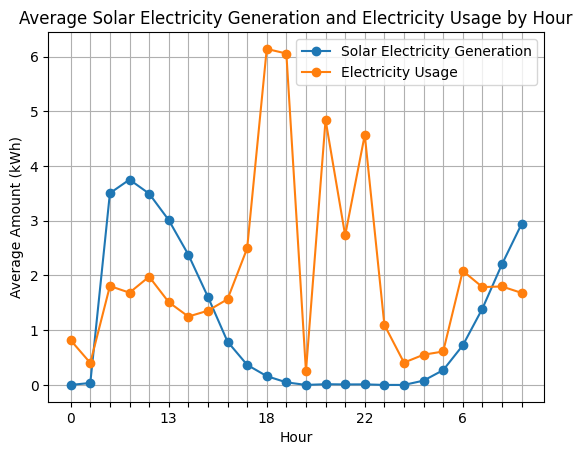

In [53]:
# Calculate average solar electricity generation and average electricity usage for each hour
hourly_avg = df.groupby('Hour')['Solar_Generation_kWh', 'Electricity_Usage_kWh'].mean()

# Create a graph showing average solar electricity generation and average electricity usage for each hour
plt.figure(figsize=(12, 8))
hourly_avg.plot(kind='line', marker='o')
plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Amount (kWh)')
plt.grid()
plt.xticks(range(0, 24))
plt.legend(['Solar Electricity Generation', 'Electricity Usage'])
plt.show()

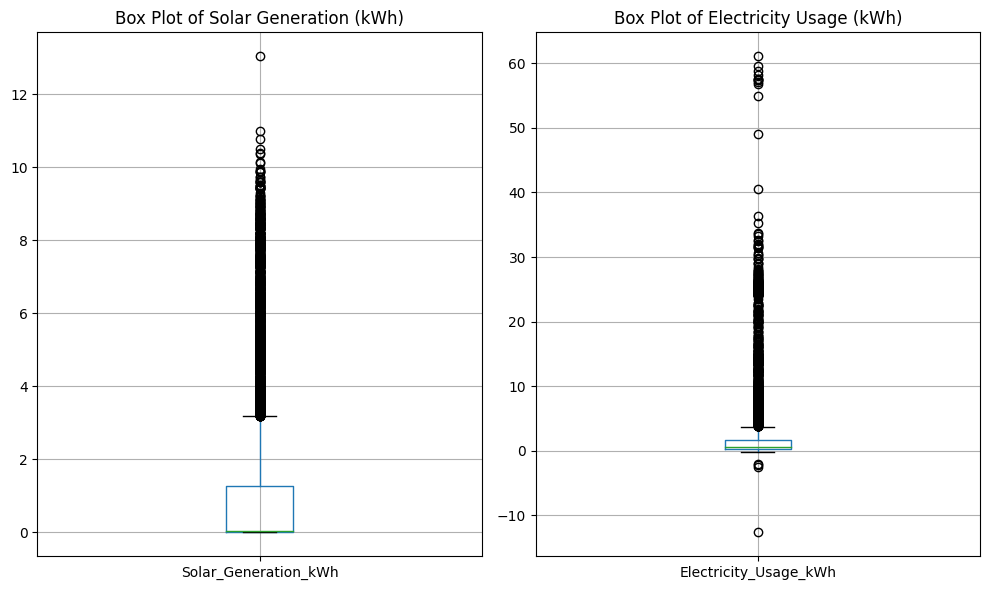

In [54]:
#checking for outliers
# Create box plots to visualize potential outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='Solar_Generation_kWh')
plt.title('Box Plot of Solar Generation (kWh)')

plt.subplot(1, 2, 2)
df.boxplot(column='Electricity_Usage_kWh')
plt.title('Box Plot of Electricity Usage (kWh)')

plt.tight_layout()
plt.show()

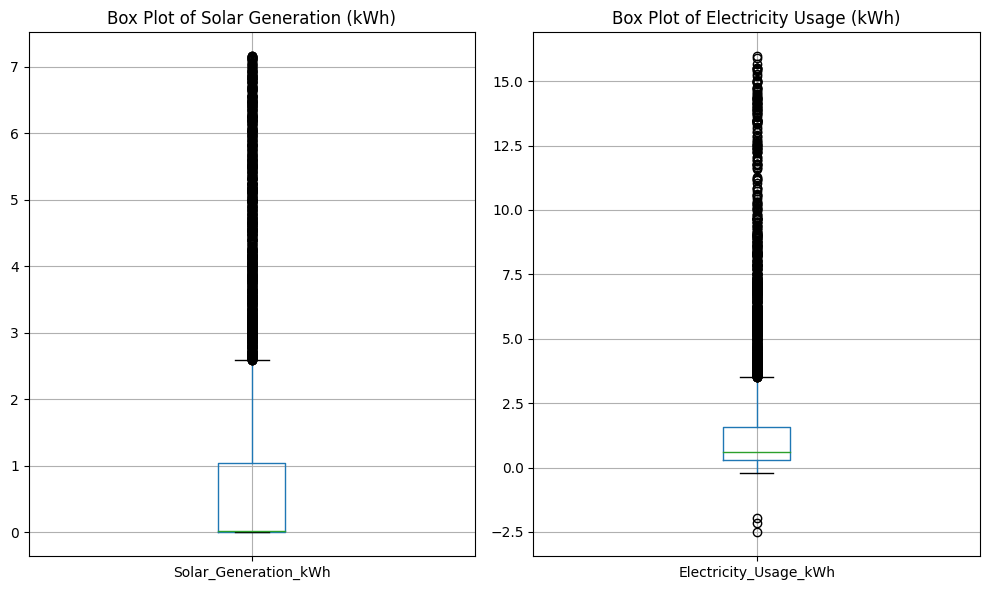

In [55]:
#removing outliers
# Calculate z-scores for each column
z_scores_solar = np.abs((df['Solar_Generation_kWh'] - df['Solar_Generation_kWh'].mean()) / df['Solar_Generation_kWh'].std())
z_scores_usage = np.abs((df['Electricity_Usage_kWh'] - df['Electricity_Usage_kWh'].mean()) / df['Electricity_Usage_kWh'].std())

# Set a z-score threshold for outlier removal (e.g., z-score > 3)
z_score_threshold = 3

# Remove outliers based on z-scores
df = df[(z_scores_solar <= z_score_threshold) & (z_scores_usage <= z_score_threshold)]

# Create box plots to visualize data after removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='Solar_Generation_kWh')
plt.title('Box Plot of Solar Generation (kWh)')

plt.subplot(1, 2, 2)
df.boxplot(column='Electricity_Usage_kWh')
plt.title('Box Plot of Electricity Usage (kWh)')

plt.tight_layout()
plt.show()

In [59]:
df.head(10)

,Hour,Solar_Generation_kWh,Electricity_Usage_kWh
0,0,0.000,1.509849
1,1,0.000,1.411859
2,2,0.000,1.023898
3,3,0.000,0.642000
4,4,0.000,0.960000
5,5,0.012,0.897000
6,6,0.006,0.648000
7,7,0.009,0.774000
8,8,0.012,1.299000
9,9,0.846,0.606000


In [56]:
#descriptive statistics for nutrition data set.
df.describe()

,Solar_Generation_kWh,Electricity_Usage_kWh
count,8257.000000,8257.000000
mean,0.876524,1.475275
std,1.559501,2.247494
min,0.000000,-2.514000
25%,0.000000,0.307969
50%,0.021000,0.621000
75%,1.035000,1.593000
max,7.158000,15.972000


<ipython-input-60-9c3fd14984fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


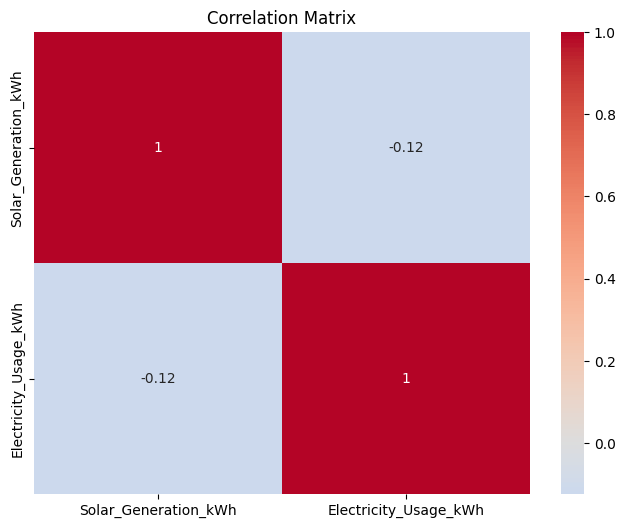

In [60]:
# Calculate correlation matrix
correlation_matrix = df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [61]:
# Calculate correlation between 'Hour', 'Solar_Generation_kWh', and 'Electricity_Usage_kWh'
correlation_matrix = df[['Hour', 'Solar_Generation_kWh', 'Electricity_Usage_kWh']].corr()

# Display the correlation matrix
print(correlation_matrix)

                       Solar_Generation_kWh  Electricity_Usage_kWh
Solar_Generation_kWh               1.000000              -0.124541
Electricity_Usage_kWh             -0.124541               1.000000


<ipython-input-61-52dcc5f871f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Hour', 'Solar_Generation_kWh', 'Electricity_Usage_kWh']].corr()
